Invernadero-Inteligente-Tinkercad

In [ ]:
"""
#include <Servo.h>
#include <Adafruit_LiquidCrystal.h>

// Pin
#define LedRed 13;
#define LedOrange 12;
#define LedYellow 11;
#define LedGreen 10;
#define LedBlue 9;
#define Piezo 8;
#define Trig 7;
#define Echo 6;
#define SerMor 5;
#define SenH A0;
#define SenF A1;

// Variable
Adafruit_LiquidCrystal lcd(0);
Servo motor;
int humedad = 0;
int luminicidad = 0;
int tiempo = 0;
int distancia = 0;

void setup() {
  // Analog
  pinMode(SenH, INPUT);
  pinMode(SenF, INPUT);

  // Digital
  pinMode(Piezo, OUTPUT);
  pinMode(Trig, OUTPUT);
  pinMode(Echo, INPUT);
  motor.attach(SerMor);

  lcd.begin(16,2);
  Serial.begin(9600);
}

void loop() {
  iniciarTrigger();
  obtenerDatos();
  controlLeds();
  controlMotor();
  actualizarPantalla();
  Serial.println("Humedad: " + String(humedad) + "%");
  Serial.println("Luminicidad: " + String(luminicidad));
  Serial.println("Distancia: " + String(distancia) + "cm");
  delay(1000);
}

void iniciarTrigger(){
  digitalWrite(Trig, LOW);
  delayMicroseconds(2);
  digitalWrite(Trig, HIGH);
  delayMicroseconds(10);
  digitalWrite(Trig, LOW);
}

void obtenerDatos() {
  humedad = map(analogRead(SenH), 0, 1023, 0, 117);
  luminicidad = analogRead(SenF);
  tiempo = pulseIn(Echo, HIGH);
  distancia = ( tiempo * 0.000001 * 34000.0 )/ 2;
}

void controlLeds() {
  digitalWrite(LedRed, LOW);
  digitalWrite(LedOrange, LOW);
  digitalWrite(LedYellow, LOW);
  digitalWrite(LedGreen, LOW);
  digitalWrite(LedBlue, LOW);

  if (humedad < 25) {
    digitalWrite(LedRed, HIGH);
  } else if (humedad < 50) {
    digitalWrite(LedOrange, HIGH);
  } else if (humedad < 75) {
    digitalWrite(LedYellow, HIGH);
  } else if (humedad < 95) {
    digitalWrite(LedGreen, HIGH);
  } else {
    digitalWrite(LedBlue, HIGH);
  }
}

void controlMotor() {
  if (luminicidad < 300) {
    motor.write(0);
  } else if (distancia < 50) {
    motor.write(0);
    tone(Piezo, 523, 200);
  } else {
    motor.write(180);
  }
}

void actualizarPantalla() {
  if (luminicidad < 300) {
    lcd.setCursor(0,0);
    lcd.print("Noche");
  } else {
    lcd.setCursor(0,0);
    lcd.print("Dia  ");
  }

  lcd.setCursor(6,0);
  lcd.print("//");

  int angulo = motor.read();
  if (angulo == 0) {
    lcd.setCursor(9,0);
    lcd.print("Cerrado");
  } else {
    lcd.setCursor(9,0);
    lcd.print("Abierto");
  }

  lcd.setCursor(0,1);
  lcd.print("Humedad: " + String(humedad) + "%     ");
  lcd.setCursor(0,1);
  lcd.println("Distancia: " + String(distancia) + "cm  ");
}
"""

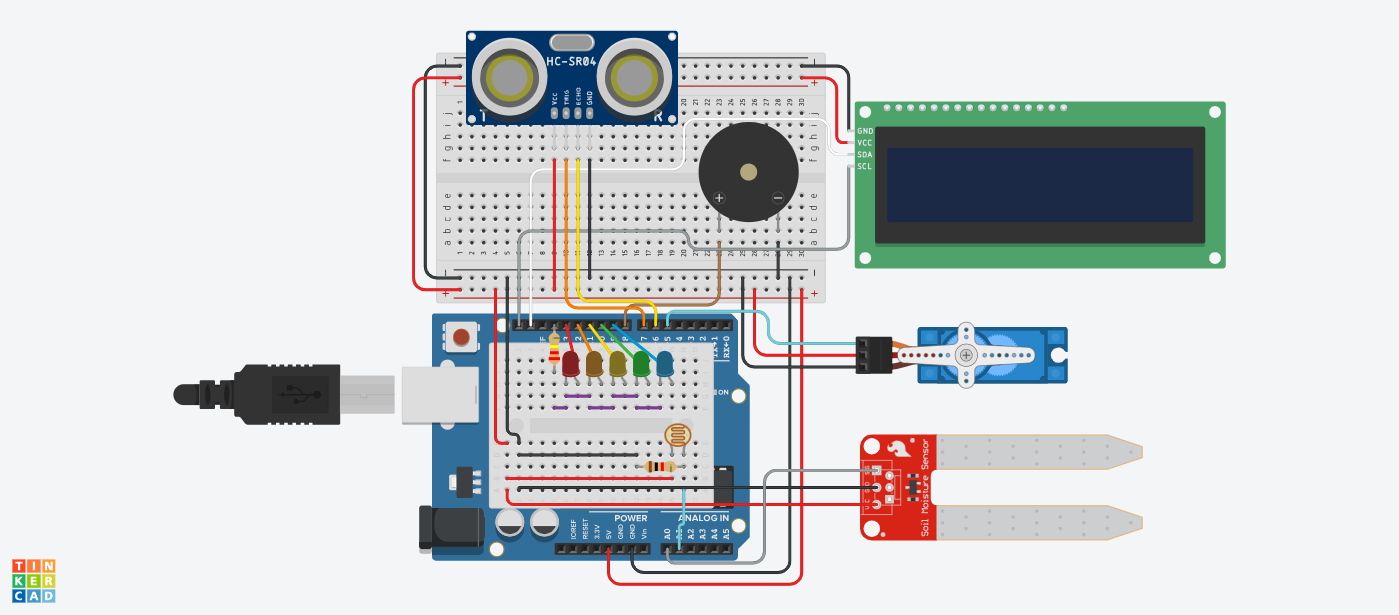

Main - TinKercad

In [ ]:
"""
#include <Servo.h>
#include <Adafruit_LiquidCrystal.h>

//Pin
/*int LedRed = 13;
int LedYellow = 12;
int LedBlue = 11;
int LedWhite = 10;
int Trig = 9;
int Echo = 8;
int Piezo = 7;
int SerMor = 6;
int SenH = A0;
int SenF = A1;*/
const int LedRed = 13;
const int LedYellow = 12;
const int LedBlue = 11;
const int LedWhite = 10;
const int Trig = 9;
const int Echo = 8;
const int Piezo = 7;
const int SerMor = 6;
const int SenH = A0;
const int SenF = A1;

//Variable
Adafruit_LiquidCrystal lcd(0);
Servo motor;
int humedad;
int luminicidad;
int tiempo;
int distancia;

void setup(){
  // Analog
  pinMode(SenH, INPUT);
  pinMode(SenF, INPUT);

  // Digital
  pinMode(Piezo, OUTPUT);
  pinMode(Trig, OUTPUT);
  pinMode(Echo, INPUT);
  motor.attach(SerMor);

  lcd.begin(16,2);
  Serial.begin(9600);
}

void loop() {
  iniciarTrigger();
  obtenerDatos();
  controlLeds();
  controlMotor();
  actualizarPantalla();
  Serial.println("Humedad: " + String(humedad) + "%");
  Serial.println("Luminicidad: " + String(luminicidad));
  Serial.println("Distancia: " + String(distancia) + "cm");
  delay(1000);
}

void iniciarTrigger(){
  digitalWrite(Trig, LOW);
  delayMicroseconds(2);
  digitalWrite(Trig, HIGH);
  delayMicroseconds(10);
  digitalWrite(Trig, LOW);
}

void obtenerDatos() {
  humedad = map(analogRead(SenH), 0, 1023, 0, 117);
  luminicidad = analogRead(SenF);
  tiempo = pulseIn(Echo, HIGH);
  distancia = (tiempo * 0.000001 * 34000.0)/ 2;
}

void controlLeds() {
  digitalWrite(LedRed, LOW);
  digitalWrite(LedYellow, LOW);
  digitalWrite(LedBlue, LOW);

  if (humedad < 30) {
    digitalWrite(LedRed, HIGH);
  } else if (humedad < 70) {
    digitalWrite(LedYellow, HIGH);
  } else {
    digitalWrite(LedBlue, HIGH);
  }

  if (luminicidad < 300) {
    digitalWrite(LedWhite, HIGH);
  } else {
    digitalWrite(LedWhite, LOW);
  }
}

void controlMotor() {
  if (luminicidad < 300) {
    motor.write(0);
  } else if (distancia < 10) {
    motor.write(0);
    tone(Piezo, 523, 200);
  } else {
    motor.write(180);
  }
}

void actualizarPantalla() {
  if (luminicidad < 300) {
    lcd.setCursor(0,0);
    lcd.print("Noche");
  } else {
    lcd.setCursor(0,0);
    lcd.print("Dia  ");
  }

  lcd.setCursor(6,0);
  lcd.print("//");

  int angulo = motor.read();
  if (angulo == 0) {
    lcd.setCursor(9,0);
    lcd.print("Cerrado");
  } else {
    lcd.setCursor(9,0);
    lcd.print("Abierto");
  }

  lcd.setCursor(0,1);
  lcd.print("Humedad: " + String(humedad) + "%     ");
  delay(1000);
  lcd.setCursor(0,1);
  lcd.print("Distancia: " + String(distancia) + "cm  ");
  delay(1000);
}
"""

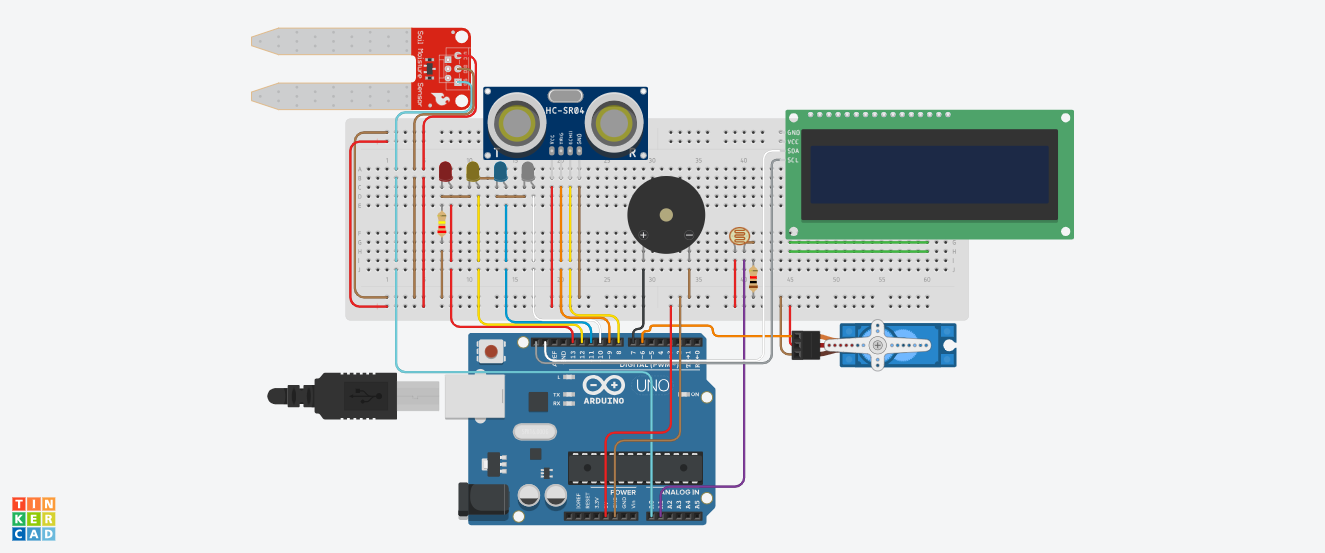